In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,MaxPooling2D,BatchNormalization,Conv2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import itertools
import warnings
import matplotlib.pyplot as plt
import os
from tensorflow.keras.metrics import categorical_crossentropy
import random

In [26]:
os.chdir('C:/Users/VEDIT/Desktop/machine learning')

In [27]:
train_path = 'data/dogs-vs-cats/train'
test_path = 'data/dogs-vs-cats/test'
valid_path = 'data/dogs-vs-cats/valid'

In [28]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
   .flow_from_directory(directory = train_path,target_size = (224,224),classes= ['cat','dog'],batch_size = 10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
   .flow_from_directory(directory = valid_path,target_size = (224,224),classes= ['cat','dog'],batch_size = 10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_path,target_size = (224,224),classes= ['cat','dog'],batch_size = 10,shuffle = False)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [29]:
assert train_batches.n == 1000
assert test_batches.n == 100
assert valid_batches.n == 200
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [30]:
img,labels = next(train_batches)
images_and_labels = list(zip(img,labels))

In [31]:
def plotf(imager):
    fig,axes = plt.subplots(1,10,figsize = (20,20))
    for ax,(image,label) in zip(axes,images_and_labels):
        ax.imshow(image)
        ax.set_title("%s"%label)
        ax.set_axis_off()
        plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

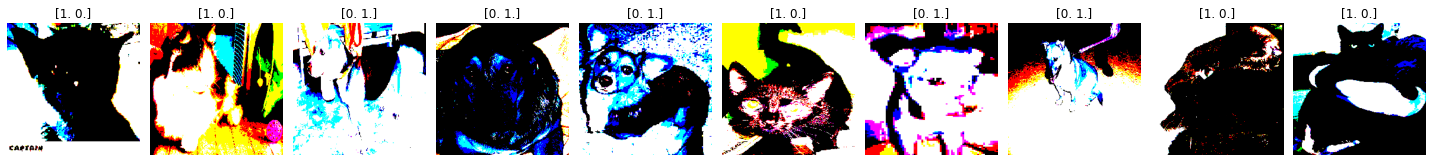

In [32]:
plotf(img)

In [33]:
model = Sequential([
    Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',input_shape =  (224,224,3),padding = 'same'),
    MaxPooling2D(pool_size = (2,2),strides = 2),
    Conv2D(filters = 64,kernel_size = (3,3),activation = 'tanh',padding = 'same'),
    Flatten(),
    Dense(units = 2,activation = 'softmax')
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 802816)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1605634   
Total params: 1,625,026
Trainable params: 1,625,026
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [18]:
model.fit(x = train_batches,validation_data = valid_batches,batch_size = 10,epochs = 30,verbose = 2)

Epoch 1/30
100/100 - 108s - loss: 1721.3556 - accuracy: 0.5300 - val_loss: 1589.7228 - val_accuracy: 0.5000
Epoch 2/30
100/100 - 105s - loss: 1820.2396 - accuracy: 0.4990 - val_loss: 2356.9402 - val_accuracy: 0.5000
Epoch 3/30
100/100 - 106s - loss: 1790.9731 - accuracy: 0.5120 - val_loss: 677.4238 - val_accuracy: 0.5100
Epoch 4/30
100/100 - 126s - loss: 1852.5637 - accuracy: 0.4960 - val_loss: 2284.3484 - val_accuracy: 0.5000
Epoch 5/30
100/100 - 124s - loss: 1941.7626 - accuracy: 0.4830 - val_loss: 1227.4872 - val_accuracy: 0.5000
Epoch 6/30
100/100 - 148s - loss: 1764.2554 - accuracy: 0.5110 - val_loss: 513.8865 - val_accuracy: 0.5200
Epoch 7/30
100/100 - 147s - loss: 1619.4503 - accuracy: 0.5140 - val_loss: 2372.9878 - val_accuracy: 0.5000
Epoch 8/30
100/100 - 121s - loss: 1430.1545 - accuracy: 0.5180 - val_loss: 2119.9810 - val_accuracy: 0.5000
Epoch 9/30
100/100 - 116s - loss: 1412.9276 - accuracy: 0.5060 - val_loss: 402.4818 - val_accuracy: 0.5200
Epoch 10/30
100/100 - 117s - lo

In [123]:
test_imgs,labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

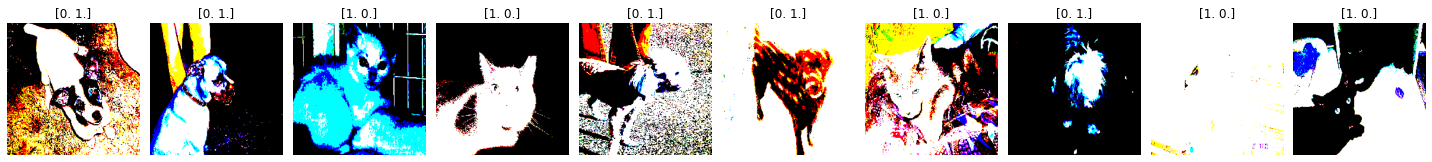

In [127]:
plotf(test_imgs)

In [128]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
vgg16model = tf.keras.applications.vgg16.VGG16()

In [1]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)

NameError: name 'tf' is not defined